In [23]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = stopwords.words('russian')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df = pd.read_csv('ds.csv')

In [25]:
df

,Unnamed: 0,text,label
0,0,Работа на строительных площадках.,3
1,1,Очистных сооружениях.,3
2,2,Гнутье арматурной стали на механических станка...,0
3,3,Сборка и установка сеток и плоских...,0
4,4,Вязка арматуры.,0
...,...,...,...
8081,8081,"ТРЕБУЕТСЯ МАСТЕР С ХОРОШИМ ОПЫТОМ, ОТВЕТСТВЕНН...",0
8082,8082,Пожалуйста отправляйте краткое резюме о себе н...,0
8083,8083,"УЧЕНИКОВ, ПОМАГАНОВ, ПОДАВАНОВ И С ОПЫТОМ ОКЛЕ...",0
8084,8084,ПОЖАЛУЙСТА НЕ ТРАТЬТЕ НИ СВОЕ НИ НАШЕ ВРЕМЯ НА...,0


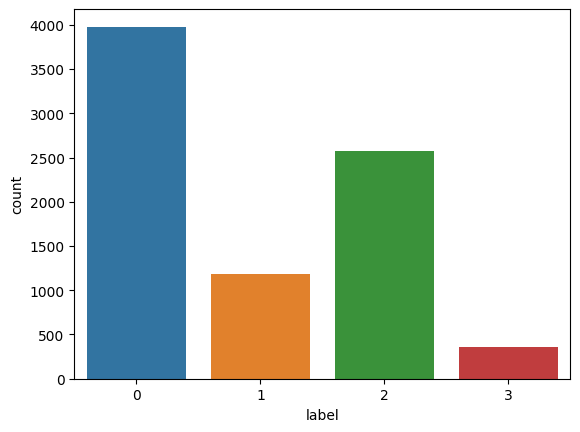

In [26]:
ax = sns.countplot(x="label", data=df)

In [27]:
sw = stopwords.words('russian')

def clean_text(text):

    text = text.lower()

    text = re.sub(r"[^a-zA-Zа-яёА-ЯЁ?.!,?:]+", " ", text)
    text = re.sub(r"http\S+", "",text) #Removing URLs
    #text = re.sub(r"http", "",text)

    html=re.compile(r'<.*?>')

    text = html.sub(r'',text) #Removing html tags

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations

    text = [word.lower() for word in text.split() if word.lower() not in sw]

    text = " ".join(text) #removing stopwords

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis

    return text

In [28]:
df['preprocessed_text'] = df['text'].apply(lambda x: clean_text(x))

df.head()

,Unnamed: 0,text,label,preprocessed_text
0,0,Работа на строительных площадках.,3,работа строительных площадках
1,1,Очистных сооружениях.,3,очистных сооружениях
2,2,Гнутье арматурной стали на механических станка...,0,гнутье арматурной стали механических станках к...
3,3,Сборка и установка сеток и плоских...,0,сборка установка сеток плоских
4,4,Вязка арматуры.,0,вязка арматуры


In [29]:
df

,Unnamed: 0,text,label,preprocessed_text
0,0,Работа на строительных площадках.,3,работа строительных площадках
1,1,Очистных сооружениях.,3,очистных сооружениях
2,2,Гнутье арматурной стали на механических станка...,0,гнутье арматурной стали механических станках к...
3,3,Сборка и установка сеток и плоских...,0,сборка установка сеток плоских
4,4,Вязка арматуры.,0,вязка арматуры
...,...,...,...,...
8081,8081,"ТРЕБУЕТСЯ МАСТЕР С ХОРОШИМ ОПЫТОМ, ОТВЕТСТВЕНН...",0,"требуется мастер хорошим опытом, ответственный..."
8082,8082,Пожалуйста отправляйте краткое резюме о себе н...,0,пожалуйста отправляйте краткое резюме нам сооб...
8083,8083,"УЧЕНИКОВ, ПОМАГАНОВ, ПОДАВАНОВ И С ОПЫТОМ ОКЛЕ...",0,"учеников, помаганов, подаванов опытом оклейки ..."
8084,8084,ПОЖАЛУЙСТА НЕ ТРАТЬТЕ НИ СВОЕ НИ НАШЕ ВРЕМЯ НА...,0,пожалуйста тратьте свое наше время пустые пере...


In [30]:
X_train, X_test , y_train, y_test = train_test_split(df['preprocessed_text'].values, df['label'].values, test_size=0.05, random_state=2024, stratify=df['label'].values)

In [31]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [32]:
classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [33]:
y_pred = classifier.predict(tfidf_test_vectors)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       199
           1       0.75      0.69      0.72        59
           2       0.75      0.77      0.76       129
           3       0.40      0.33      0.36        18

    accuracy                           0.74       405
   macro avg       0.66      0.64      0.65       405
weighted avg       0.74      0.74      0.74       405



In [35]:
excel = pd.read_excel('/content/Датасет.xlsx')

In [36]:
excel

,id,name(название),specialization(специализация),responsibilities(Должностные обязанности),requirements(Требования к соискателю),terms(Условия),skills(Ключевые навыки),salary_from,salary_to,object,...,updated_by,position,phone,website,email,image,unique_code,city_code,source_id,link_resource
0,9495846,Арматурщик,Арматурщик,Работа на строительных площадках. Очистных соо...,NaN,NaN,NaN,150000,170000,NaN,...,\N,Арматурщик,NaN,hh,hh@hh.ru,\N,HH-81058502,\N,1,https://hh.ru/vacancy/81058502
1,9495850,Арматурщик,Арматурщик,Гнутье арматурной стали на механических станка...,NaN,NaN,NaN,130000,150000,NaN,...,\N,Арматурщик,NaN,hh,hh@hh.ru,\N,HH-80163818,\N,1,https://hh.ru/vacancy/80163818
2,9495851,Арматурщик,Арматурщик,Вязка арматуры.,NaN,NaN,NaN,85000,90000,NaN,...,\N,Арматурщик,NaN,hh,hh@hh.ru,\N,HH-77729491,\N,1,https://hh.ru/vacancy/77729491
3,2,Арматурщик,Арматурщик,Выполнение работ по гнутью и резке арматурной ...,Выполнение работ по гнутью и резке арматурной ...,NaN,\N,50000,100000,"ООО ""АЛЬМИС_ИНТЕГРАЛ""",...,1,Арматурщик,74959214241,https://almisintegral.ru/,info@almisintegral.ru,\N,\N,\N,1,\N
4,9388857,Арматурщик,Арматурщик Вахта в мcк (питание+проживание) 60/30,Вахта в город Москва. Обязанности: - армирова...,опыт в строительстве приветствуется; работа в ...,продолжительность вахты 60/30 (продление вахты...,NaN,67000,134000,NaN,...,\N,Арматурщик,NaN,avito,avito@avito.ru,\N,A-3037298578,\N,1,https://avito.ru/3037298578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,9306889,Инженер,Инженер конструктор,Обязанности: Проектирование ультразвуковых пре...,NaN,офисные условия,NaN,35000,35000,NaN,...,\N,Инженер,NaN,avito,avito@avito.ru,\N,A-1580492578,\N,1,https://avito.ru/1580492578
995,9306890,Монтажник,Монтажник вентиляции/разнорабочий,"Внимание пока обьявление висит, ведется набор!...",Приветствуется опыт по установке систем кондиц...,Оплата производится раз в неделю по субботам!...,NaN,1800,46800,NaN,...,\N,Монтажник,NaN,avito,avito@avito.ru,\N,A-1578246023,\N,1,https://avito.ru/1578246023
996,9306891,Слесарь-Ремонтник,Слесарь - автомеханик в цех по ремонту карданов,Требуется слесарь в цех по ремонту и балансиро...,Обучаем. Токарные навыки и сварочные навыки пр...,"Зарплата, график работы обсуждаются.",NaN,50000,50000,NaN,...,\N,Слесарь-Ремонтник,NaN,avito,avito@avito.ru,\N,A-928159469,\N,1,https://avito.ru/928159469
997,9306892,Арматурщик,"Оклейщик автомобилей, полиуретан винил, армату...",🔥 К нам в команду требуются: 🔸 Мастер по окле...,"пыт работы, знание и понимание принципов работ...",NaN,NaN,120000,200000,NaN,...,\N,Арматурщик,NaN,avito,avito@avito.ru,\N,A-1047100555,\N,1,https://avito.ru/1047100555


In [41]:
from razdel import sentenize

In [42]:
def post(classes):
  used=[]

  helper = [0]
  not_check = [0]
  for c in classes:
    if c not in helper:
      helper.append(c)
      not_check.append(helper[-2])

    if c in used and c not in not_check:
      i = used[::-1].index(c)
      i = len(used)-i
      for j in range(i, len(used)):
        used[j]=c

    if c in not_check:
      used.append(0)
    else:
      used.append(c)

  return used

In [46]:
lst_tuples = []

In [47]:
for idx, elem in enumerate(excel['responsibilities(Должностные обязанности)']):
    sents = [clean_text(_.text) for _ in list(sentenize(elem))]
    sents_without_cleaning = [_.text for _ in list(sentenize(elem))]
    vecs = tfidf_vectorizer.transform(sents)
    preds = classifier.predict(vecs)
    post_preds = post(preds)
    req_text = ''
    terms_text = ''
    notes_text = ''
    for pred_idx, pred_elem in enumerate(post_preds):
        if pred_elem == 1:
            req_text += sents_without_cleaning[pred_idx] + " "
        elif pred_elem == 2:
            terms_text += sents_without_cleaning[pred_idx] + " "
        elif pred_elem == 3:
            notes_text += sents_without_cleaning[pred_idx] + " "
    curr_tuple = (elem, req_text.strip(), terms_text.strip(), notes_text.strip())
    lst_tuples.append(curr_tuple)

In [48]:
result_df = pd.DataFrame(lst_tuples, columns=['responsibilities(Должностные обязанности)', 'requirements(Требования к соискателю)', 'terms(Условия)', 'notes(Примечания)'])

In [49]:
result_df

,responsibilities(Должностные обязанности),requirements(Требования к соискателю),terms(Условия),notes(Примечания)
0,Работа на строительных площадках. Очистных соо...,,,Работа на строительных площадках. Очистных соо...
1,Гнутье арматурной стали на механических станка...,,,
2,Вязка арматуры.,,,
3,Выполнение работ по гнутью и резке арматурной ...,Выполнение работ по гнутью и резке арматурной ...,,
4,Вахта в город Москва. Обязанности: - армирова...,Требования: - опыт в строительстве приветствуе...,Условия: - продолжительность вахты 60/30 (прод...,- ЗП в срок и без задержек; - Авансирование дв...
...,...,...,...,...
994,Обязанности: Проектирование ультразвуковых пре...,,Условия: офисные условия,
995,"Внимание пока обьявление висит, ведется набор!...",Приветствуется опыт по установке систем кондиц...,Оплата производится раз в неделю по субботам! ...,
996,Требуется слесарь в цех по ремонту и балансиро...,Обучаем.,"Зарплата, график работы обсуждаются.",
997,🔥 К нам в команду требуются: 🔸 Мастер по окле...,"❗️Если вы фрилансер, то возможна работа у нас ...",,


In [51]:
result_df.to_csv('result_ds-utf-8.csv', encoding='utf-8-sig')

In [52]:
pd.read_csv('/content/result_ds-utf-8.csv')

,Unnamed: 0,responsibilities(Должностные обязанности),requirements(Требования к соискателю),terms(Условия),notes(Примечания)
0,0,Работа на строительных площадках. Очистных соо...,NaN,NaN,Работа на строительных площадках. Очистных соо...
1,1,Гнутье арматурной стали на механических станка...,NaN,NaN,NaN
2,2,Вязка арматуры.,NaN,NaN,NaN
3,3,Выполнение работ по гнутью и резке арматурной ...,Выполнение работ по гнутью и резке арматурной ...,NaN,NaN
4,4,Вахта в город Москва. Обязанности: - армирова...,Требования: - опыт в строительстве приветствуе...,Условия: - продолжительность вахты 60/30 (прод...,- ЗП в срок и без задержек; - Авансирование дв...
...,...,...,...,...,...
994,994,Обязанности: Проектирование ультразвуковых пре...,NaN,Условия: офисные условия,NaN
995,995,"Внимание пока обьявление висит, ведется набор!...",Приветствуется опыт по установке систем кондиц...,Оплата производится раз в неделю по субботам! ...,NaN
996,996,Требуется слесарь в цех по ремонту и балансиро...,Обучаем.,"Зарплата, график работы обсуждаются.",NaN
997,997,🔥 К нам в команду требуются: 🔸 Мастер по окле...,"❗️Если вы фрилансер, то возможна работа у нас ...",NaN,NaN


<Axes: >

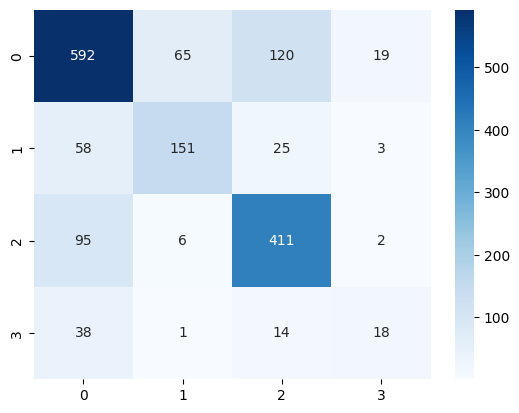

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')

In [2]:
import joblib

In [ ]:
joblib.dump(classifier, "./rf_classifier.joblib")

['./rf_classifier.joblib']

In [3]:
loaded_rf = joblib.load("/content/rf_classifier.joblib")

In [4]:
import pickle

In [5]:
with open('tfidf-vec.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [6]:
!pip install razdel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from razdel import sentenize

In [9]:
txt = 'Крупной Федеральной Компании для работы ВАХТОВЫМ МЕТОДОМ на строительные участки требуются специалисты: Обязанности: · Работы на монолите (заливка бетона, укладка и вязка арматуры) · Монтажные работы (МК/ЖБК) · Общестроительные работы и вспомогательные работы Требования: · Понимание работы в бригаде · Дисциплинированность, трудолюбие · Опыт работы в строительстве будет преимуществом · (готовы рассмотреть кандидатов и без опыта работы, всему научим, в перспективе карьерный рост до бригадира/мастера участка) Условия: · Продолжительность вахты 60/30, 90/30 (можно больше) · Официальное трудоустройство по ТК РФ с первой рабочей смены · ЗП строго в срок и без задержек (документальное подтверждение в трудовом договоре) · Авансирование (15 и 30го числа каждого месяца по 15000 р.) · Обеспечим сезонной спецодеждой и СИЗами без вычетов из ЗП · Организованное трехраховое горячее питание за счет компании · Организованные отправки до объектов (покупаем билеты на вахту/с вахты) · Помощь в прохождении мед. осмотра (при необходимости) · Возможность получить квалификационное удостоверение (обучение основным и смежным специальностям в нашем аккредитованном учебном центре)'

In [20]:
senst = [clean_text(_.text) for _ in list(sentenize(txt))]

In [15]:
senst

['крупной федеральной компании работы вахтовым методом строительные участки требуются специалисты обязанности работы монолите заливка бетона, укладка вязка арматуры монтажные работы мк жбк общестроительные работы вспомогательные работы требования понимание работы бригаде дисциплинированность, трудолюбие опыт работы строительстве преимуществом готовы рассмотреть кандидатов опыта работы, всему научим, перспективе карьерный рост бригадира мастера участка условия продолжительность вахты , официальное трудоустройство тк рф первой рабочей смены зп строго срок задержек документальное подтверждение трудовом договоре авансирование го числа каждого месяца р',
 'обеспечим сезонной спецодеждой сизами вычетов зп организованное трехраховое горячее питание счет компании организованные отправки объектов покупаем билеты вахту вахты помощь прохождении мед осмотра необходимости возможность получить квалификационное удостоверение обучение основным смежным специальностям нашем аккредитованном учебном центр

In [16]:
help_vec = vectorizer.transform(senst)

In [17]:
loaded_rf.predict(help_vec)

array([1, 3])

In [ ]:
with open('tfidf-vec.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)